Using example from:
http://wilkox.org/treemapify/

In [14]:
library(ggplot2)
library(treemapify)
library(dplyr)
library(rWCVP)
library(galah)

In [15]:
galah_config(email = readLines(here::here("secrets","galah-email.txt")))

Set working directory

In [16]:
here::i_am("figures-from-tables/fire-history-figure.ipynb")

here() starts at /Users/z3529065/proyectos/fireveg/fireveg-analysis



In [17]:
st_table <- readRDS(here::here("data","Summary-traits-species.rds"))

In [18]:
str(st_table)

'data.frame':	15732 obs. of  19 variables:
 $ family    : chr  "Brassicaceae" "Myrtaceae" "Myrtaceae" "Apiaceae" ...
 $ genus     : chr  "Lepidium" "Eucalyptus" "Melaleuca" "Actinotus" ...
 $ spp       : num  2358 2359 2360 2361 2362 ...
 $ species   : chr  "Lepidium oxytrichum" "Eucalyptus williamsiana" "Melaleuca glomerata" "Actinotus helianthi" ...
 $ nquadrat  : num  0 0 0 0 0 2 1 0 0 0 ...
 $ germ8     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rect2     : num  0 1 0 2 0 0 0 0 0 0 ...
 $ germ1     : num  0 1 0 1 0 0 0 0 0 1 ...
 $ grow1     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ repr4     : num  0 0 0 1 0 0 0 0 0 0 ...
 $ surv5     : num  0 0 0 2 0 0 0 0 0 0 ...
 $ surv6     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ surv7     : num  0 0 0 1 0 0 0 0 0 0 ...
 $ disp1     : num  3 0 0 3 1 1 0 1 0 1 ...
 $ repr3a    : num  0 0 0 0 0 0 1 0 0 0 ...
 $ repr3     : num  0 0 0 3 0 0 0 0 0 0 ...
 $ surv4     : num  0 0 0 0 0 0 1 0 0 0 ...
 $ surv1     : num  1 6 3 14 1 1 3 1 0 7 ...
 $ rank_order: chr  "Brassica

In [19]:
fams <- unique(st_table$family)
length(fams)

[1] 368

In [20]:
st_table %>% slice(1:5)

family,genus,spp,species,nquadrat,germ8,rect2,germ1,grow1,repr4,surv5,surv6,surv7,disp1,repr3a,repr3,surv4,surv1,rank_order
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Brassicaceae,Lepidium,2358,Lepidium oxytrichum,0,0,0,0,0,0,0,0,0,3,0,0,0,1,Brassicales
Myrtaceae,Eucalyptus,2359,Eucalyptus williamsiana,0,0,1,1,0,0,0,0,0,0,0,0,0,6,Myrtales
Myrtaceae,Melaleuca,2360,Melaleuca glomerata,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Myrtales
Apiaceae,Actinotus,2361,Actinotus helianthi,0,0,2,1,0,1,2,0,1,3,0,3,0,14,Apiales
Apiaceae,Apium,2362,Apium prostratum,0,0,0,0,0,0,0,0,0,1,0,0,0,1,Apiales


In [25]:
oos <- table(st_table$rank_order)


[1] "Anthocerotales"   "Aquifoliales"     "Austrobaileyales" "Bartramiales"    
 [5] "Buxales"          "Ceratophyllales"  "Dendrocerotales"  "Dioscoreales"    
 [9] "Equisetales"      "Fossombroniales"  "Funariales"       "Ginkgoales"      
[13] "Grimmiales"       "Hedwigiales"      "Hypnodendrales"   "Isoetales"       
[17] "Lunulariales"     "Marattiales"      "Metzgeriales"     "Orthotrichales"  
[21] "Osmundales"       "Pallaviciniales"  "Pandanales"       "Polytrichales"   
[25] "Pottiales"        "Ptychomniales"    "Rhizogoniales"    "Selaginellales"  
[29] "Sphagnales"

In [29]:
gt_table <- st_table %>% 
    slice_sample(n=5000) %>%
    mutate(
        rank_order = case_when(
            rank_order %in% names(oos)[oos<10] ~ "small orders",
            is.na(rank_order) ~ "unknown",
            TRUE ~ rank_order
        ),
        fielddata=nquadrat>0,
          litdata=germ8+rect2+grow1>0,
          kldg=case_when(
              fielddata & litdata ~ "both",
              fielddata ~ "fieldata",
              litdata ~ "litdata",
              TRUE ~ "none"
          )
          )
clrs <- c(none="aliceblue", fieldata="yellow", litdata="orange", both="maroon")

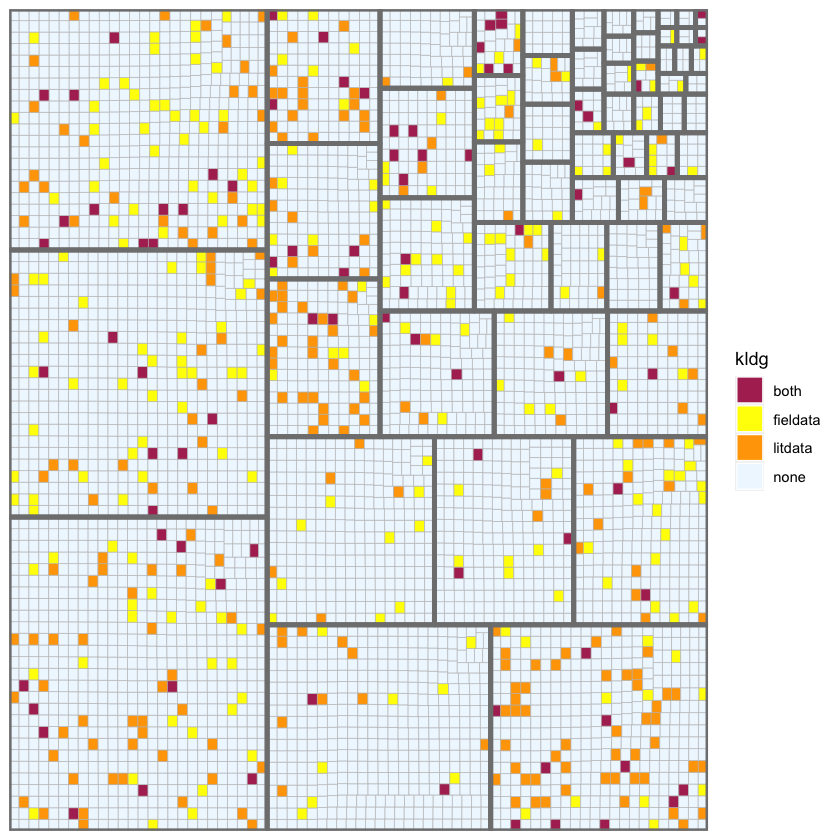

In [30]:
ggplot(gt_table, aes(area=1, fill = kldg, label = genus,
                subgroup = rank_order)) +
  geom_treemap() +
  geom_treemap_subgroup_border() +
  scale_fill_manual(values=clrs)

In [26]:
 st_table %>% 
    filter(is.na(rank_order)) %>% 
    group_by(family) %>%
summarise(n=n_distinct(genus))

family,n
<chr>,<int>
Agavaceae,4
Anthericaceae,11
Athyriaceae,4
Aucubaceae,1
Azollaceae,1
Bangiaceae,1
Batrachospermaceae,1
Bombacaceae,1
Boraginaceae,19


In [ ]:
Check taxonomy with MCVP

In [ ]:
matched_table <- wcvp_match_names(head(st_table), name_col="species")

In [ ]:
str(matched_table)